In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore')

pd.set_option('display.float_format', lambda x: '%.2f' % x)


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


In [66]:
df = pd.read_csv('Salary_Data.csv')
sal = df['Salary']
exp=df['YearsExperience']
df=pd.DataFrame({'EXPERIENCE':exp,'SALARY':sal})
df

,EXPERIENCE,SALARY
0,1.10,39343
1,1.30,46205
2,1.50,37731
3,2.00,43525
4,2.20,39891
5,2.90,56642
6,3.00,60150
7,3.20,54445
8,3.20,64445
9,3.70,57189


In [67]:
df.head()

,EXPERIENCE,SALARY
0,1.10,39343
1,1.30,46205
2,1.50,37731
3,2.00,43525
4,2.20,39891


In [68]:
df.describe()

,EXPERIENCE,SALARY
count,33.00,33.00
mean,5.35,74426.03
std,2.82,26603.29
min,1.10,37731.00
25%,3.20,56642.00
50%,4.90,63218.00
75%,7.90,98273.00
max,10.50,122391.00


In [69]:
df.info()
salary=np.array(df['SALARY'])
experience=np.array(df['EXPERIENCE'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   EXPERIENCE  33 non-null     float64
 1   SALARY      33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


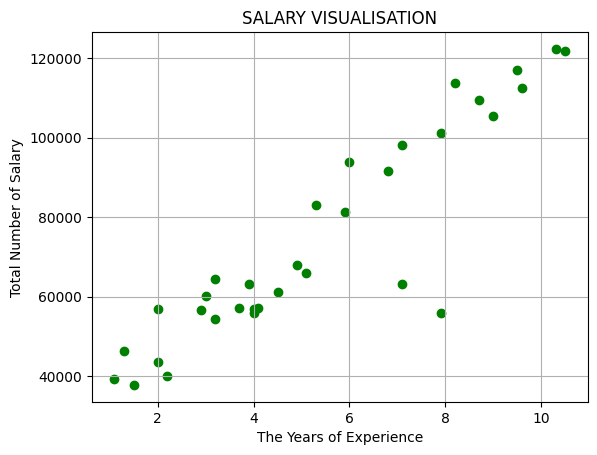

In [70]:
plt.scatter(experience, salary, color ='green')
plt.xlabel("The Years of Experience")
plt.ylabel("Total Number of Salary")
plt.title("SALARY VISUALISATION")
# plt.xticks(np.range(1,10, 1))
plt.grid()

In [71]:
experience=experience.reshape(-1,1)

In [72]:
linear_model =  LinearRegression()
linear_model.fit(X=experience, y=salary)

LinearRegression()

In [73]:
linear_model.coef_

array([8635.61582446])

In [74]:
linear_model.intercept_

28264.738441378962

In [75]:
linear_model.intercept_+linear_model.coef_*9

array([105985.28086151])

#VISUAL

In [76]:
import seaborn as sns

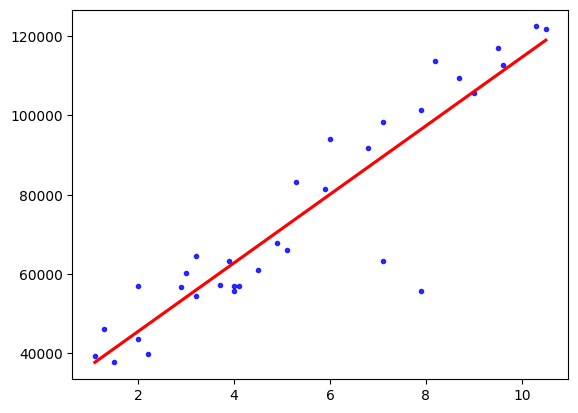

In [77]:
g=sns.regplot(x=experience, y=salary, scatter_kws={'color':'b', 's':9},ci=False, color='r')

In [35]:
linear_model.score(X=experience,y=salary)

0.8376295629489404

In [36]:
linear_model.predict(experience)

array([ 37763.91584828,  39491.03901318,  41218.16217807,  45535.9700903 ,
        47263.09325519,  53308.02433231,  54171.58591475,  55898.70907965,
        55898.70907965,  60216.51699188,  61943.64015677,  62807.20173921,
        62807.20173921,  63670.76332166,  67125.00965144,  70579.25598123,
        72306.37914612,  74033.50231101,  79214.87180568,  80078.43338813,
        86986.9260477 ,  89577.61079503,  96486.1034546 ,  99076.78820194,
       103394.59611417, 105985.28086151, 110303.08877374, 111166.65035618,
       117211.5814333 , 118938.70459819,  89577.61079503,  96486.1034546 ,
        45535.9700903 ])

In [37]:
y_predict = linear_model.predict(experience)
y_predict

array([ 37763.91584828,  39491.03901318,  41218.16217807,  45535.9700903 ,
        47263.09325519,  53308.02433231,  54171.58591475,  55898.70907965,
        55898.70907965,  60216.51699188,  61943.64015677,  62807.20173921,
        62807.20173921,  63670.76332166,  67125.00965144,  70579.25598123,
        72306.37914612,  74033.50231101,  79214.87180568,  80078.43338813,
        86986.9260477 ,  89577.61079503,  96486.1034546 ,  99076.78820194,
       103394.59611417, 105985.28086151, 110303.08877374, 111166.65035618,
       117211.5814333 , 118938.70459819,  89577.61079503,  96486.1034546 ,
        45535.9700903 ])

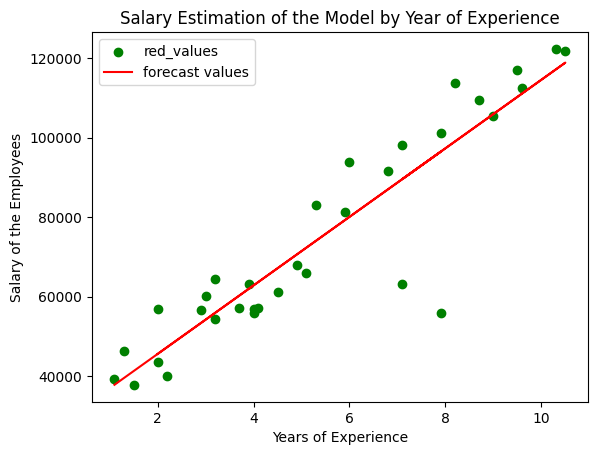

In [39]:
plt.scatter(experience, salary, color = 'green', label = 'red_values')
plt.plot(experience, y_predict, color =  'red', label =  'forecast values')
plt.legend()
plt.title("Salary Estimation of the Model by Year of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary of the Employees")
plt.show()

#MODEL EVALUATION APPLY EVALUATION METRICS

In [40]:
mse = mean_squared_error(salary, y_predict)
mae = mean_absolute_error(salary, y_predict)
rmse = np.sqrt(mse)
r2_score =  r2_score(salary, y_predict)


In [43]:
print(f'Mean Squared Error', mse)
print(f'Mean ABSOLUTE  Error', mae)
print(f'Root Mean Squared Error', rmse)
print(f'r2  Squared Error', r2_score)

Mean Squared Error 111432972.89387871
Mean ABSOLUTE  Error 7223.773229399276
Root Mean Squared Error 10556.181738388115
r2  Squared Error 0.8376295629489404
